# Information Extraction from Legal Contracts
# & Structuring Unstructured Data

Our objective is to extract various types of entities(person,org,place,time ,date,money etc.) from the legal contracts text data provided in zipped file . Also to structure the unstructured data and store in structured format.

We have to Identify the named entities in the documents and answer the following questions : 
* Name of parties involved in the contract
* Place of the contract
* Date of contract 
* Contract value (Amount of money )
* Contract duration



> **APPROACH** :
In order to Named Entity Extraction we use the powerful library of spaCY.




# Load /Install libraries

In [3]:
# ------------- to read txt files 
import os,glob
import pandas as pd

In [ ]:
#unzip text zip file
!unzip '/content/drive/MyDrive/Colab Notebooks/legal_contract_txt.zip'


In [26]:
folder_path = '/content/legal_contract_txt'

# Read File Data

In [27]:

#listing all txt file in the folder and reading them into pandas dataframe we store name of file and text
def read_files(folder_path):
  file_df = pd.DataFrame(columns=['file_name','text'])
  i=0
  for file in glob.glob(os.path.join(folder_path,"*.txt")):
    text  = open(file).read()
    name = file.split('/')[-1]
    file_df.loc[i,'file_name'] = name
    file_df.loc[i,'text'] = text
    i+=1
  return file_df





In [ ]:
df = read_files(folder_path)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  510 non-null    object
 1   text       510 non-null    object
dtypes: object(2)
memory usage: 28.1+ KB


In [31]:
df.head()

,file_name,text
0,AURASYSTEMSINC_06_16_2010-EX-10.25-STRATEGIC A...,STRATEGIC ALLIANCE AGREEMENT This STRATEGIC...
1,NmfSlfIInc_20200115_10-12GA_EX-10.5_11946987_E...,Exhibit 10.5 TRADEMARK LICENSE AGREEMENT This ...
2,IMMUNOMEDICSINC_08_07_2019-EX-10.1-PROMOTION A...,CERTAIN IDENTIFIED INFORMATION HAS BEEN EXCLUD...
3,IMPCOTECHNOLOGIESINC_04_15_2003-EX-10.65-JOINT...,Exhibit 10.65 JOINT VENTURE AGREEMENT MINDA ...
4,BANGIINC_05_25_2005-EX-10-Premium Managed Host...,03/01/05\n\n607-1295 Richards Street 604.684...


In [32]:
df['text'][0]

'STRATEGIC ALLIANCE AGREEMENT    This STRATEGIC ALLIANCE AGREEMENT (the "Agreement") is entered into as of March 18, 2010 (the "Effective Date"), between AURA  SYSTEMS INC., a Delaware Corporation ("Aura") and ZANOTTI EAST INC., a Massachusetts Corporation ("Zanotti").    WHEREAS, Aura has invented, manufactures and distributes a unique, integrated electromagnetic mobile power generation system capable of  delivering on-demand both AC and DC power for numerous end-uses, including without limitation, all-electric transport refrigeration (the  "AuraGen");     WHEREAS, the AuraGen is the subject of substantial proprietary information, including but not limited to patents, trademarks, trade secrets,  know-how, and confidential information owned by Aura;    WHEREAS, Zanotti is a world-wide leading manufacturer and distributor of transport refrigeration systems and is desirous of expanding its market  share within the United States, and    WHEREAS, Zanotti and Aura are desirous of incorporat

# Install Spacy , location tagger library



In [ ]:
!pip install spacy

In [ ]:
!pip install locationtagger

In [55]:
import nltk
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [37]:

# Visualizing named entities
import spacy
from spacy import displacy
import locationtagger

text = df['text'][1]

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent",jupyter=True)

In [88]:
text = df['text'][14]

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent",jupyter=True)

## SPACY ENTITIES LABELS
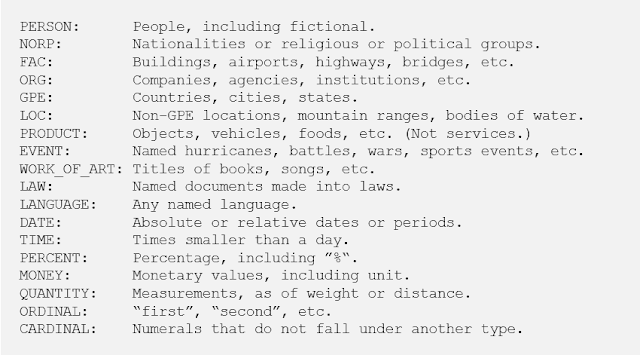

As per our initial problem defination we need to find things
1. Person / Org
2. GPE
3. DATE
4. MONEY

As we saw in above two examples and also after skimming through most texts we arrive at a conclusion that the name ,date and place of contract is contained in beginning of text . 

So we will pass half text of each file to the spacy NLP Pipeline and extract labels


In [95]:
entity_df = pd.DataFrame(columns=['cities','countries','parties_person','parties_org','date_of_contract','value_of_contract'])
i = 0
def entity_extractor(text):
  doc = nlp(text[:len(text)//2])
  #displacy.render(doc, style="ent",jupyter=True)
  entity_map = {"GPE":[], "PERSON": [], "ORG": [], "DATE":[], "MONEY":[]}
  for entities in doc.ents:
    if(entities.label_ == 'GPE'):
      entity_map['GPE'].append(entities.text)
    if(entities.label_ == 'PERSON'):
      entity_map['PERSON'].append(entities.text)
    if(entities.label_ == 'ORG'):
      entity_map['ORG'].append(entities.text)
    if(entities.label_ == 'DATE'):
      entity_map['DATE'].append(entities.text)
#eliminating duplicate entities
  entity_set = {"GPE": list(set(entity_map['GPE'])) , 
                "PERSON": list(set(entity_map['PERSON'])),
                "ORG" : list(set(entity_map['ORG']))}

  #fetch locations 
  if(len(entity_set['GPE'])>0): 
    cities , countries = location_tagger(entity_set['GPE']) #location tagger throws error if we pass empty list
  else:
    cities = 'No cities found'
    countries = 'No countries found'


  # fetch parties of contract they can be org/person we take first 2 values of each type for each party.
  if len(entity_set['PERSON'])>=2:
    person = entity_set['PERSON'][:2]
  elif len(entity_set['PERSON']) == 1:
    person = entity_set['PERSON'][0]
  else:
    person = 'No person found'

  if len(entity_set['ORG'])>=2:
    org = entity_set['ORG'][:2]
  elif len(entity_set['ORG']) == 1:
    org = entity_set['ORG'][0]
  else:
    org = 'No org found'
  


  # fetch Date of contract which will be first Date entity as it usually is in first line.
  if len(entity_map['DATE']) >=1:
    date_of_cont = entity_map['DATE'][0]
  else:
    date_of_cont = 'no date found'


  # now  pass whole text to spacy for extraction of contract money which is usually in middle or at end
  doc = nlp(text) 
  for entities in doc.ents:
    if(entities.label_ == 'MONEY'):
      entity_map['MONEY'].append(entities.text)

  # fetch contract value
  contr_value = "$".join(entity_map['MONEY'])

  #storing in dataframe
  global entity_df
  global i
  entity_df.loc[i,"cities"] = cities
  entity_df.loc[i,"countries"] = countries
  entity_df.loc[i,"parties_person"] = person
  entity_df.loc[i,"parties_org"] = org
  entity_df.loc[i,"date_of_contract"] = date_of_cont
  entity_df.loc[i,"value_of_contract"] = contr_value

  i+=1
  





In [79]:
def location_tagger(gpe_set):
  # extracting place entities.
  place_entity = locationtagger.find_locations(text = " ".join(gpe_set))
  return place_entity.cities , place_entity.countries

In [ ]:
df['text'].apply(entity_extractor)


In [97]:
entity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cities             510 non-null    object
 1   countries          510 non-null    object
 2   parties_person     510 non-null    object
 3   parties_org        510 non-null    object
 4   date_of_contract   510 non-null    object
 5   value_of_contract  510 non-null    object
dtypes: object(6)
memory usage: 44.1+ KB


In [99]:
entity_df.tail()

,cities,countries,parties_person,parties_org,date_of_contract,value_of_contract
505,"[Us, Maryland]",[],"[Medica, Law]","[The Joint Review Committee, Medica S.p.A. Via...",1933,
506,No cities found,No countries found,No person found,"[WHEREAS, herein]","July 3, 2019",
507,"[Santa Ana, California, Delaware]",[],"[Jasper keeps, Schedule C.\n\n]","[Post Holdings', EIR]","this first day of July, 2017",
508,"[Washington, Canada]",[Canada],"[Law, NVOS]","[the Internal Revenue Service, RECEITALS WHEREAS]","December 19, 2019",twenty-five million dollars$25
509,[],[],"[Offering, Compensation]","[Offering, herein]",2006,"5,000"
